# **Menghubungkan ke Google Drive**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Load Dataset**

In [ ]:
import pandas as pd

dataset_path = '/content/drive/MyDrive/praktikum_ml/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv'
data = pd.read_csv(dataset_path)

data.head()

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,Lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,Kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,Baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,Mantap,5,2022-01-15 10:05:27,4.9.3


# **Data Preprocessing**

In [ ]:
import re
import torch

def clean_text(text):
    if isinstance(text, str):
        text = text.lower()
        text = re.sub(r'\W+', ' ', text)
        return text
    else:
        return ""

data['content'] = data['content'].apply(clean_text)

data.head()

,userName,content,score,at,appVersion
0,Yuga Edit,akun gopay saya di blok,1,2022-01-21 10:52:12,4.9.3
1,ff burik,lambat sekali sekarang ini bosssku apk gojek g...,3,2021-11-30 15:40:38,4.9.3
2,Anisa Suci Rahmayuliani,kenapa sih dari kemarin sy buka aplikasi gojek...,4,2021-11-29 22:58:12,4.9.3
3,naoki yakuza,baru download gojek dan hape baru trus ditop u...,1,2022-09-03 15:21:17,4.9.3
4,Trio Sugianto,mantap,5,2022-01-15 10:05:27,4.9.3


# **Analisis Sentimen Word Cloud**

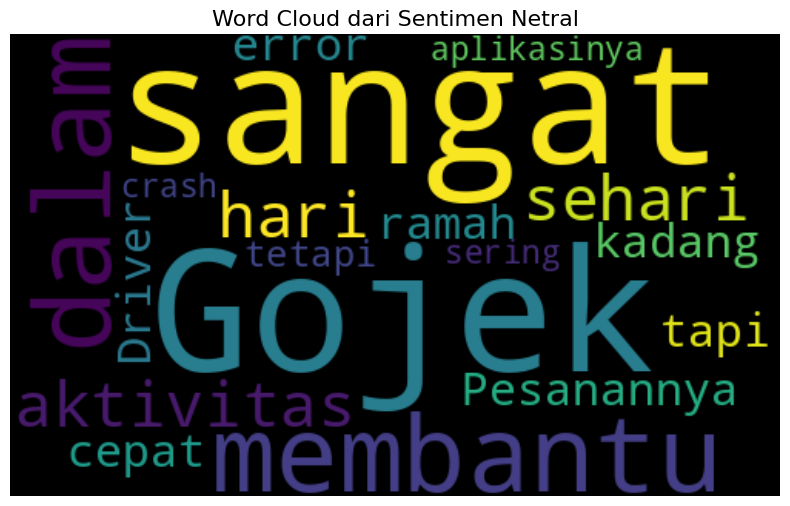

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

import pandas as pd
data = {
    'sentimen': ['Netral', 'Positif', 'Negatif', 'Netral', 'Netral', 'Positif'],
    'content': [
        "Gojek sangat membantu dalam aktivitas sehari-hari",
        "Aplikasi ini luar biasa dan sangat membantu",
        "Layanan buruk dan pengemudi tidak ramah",
        "Pesanannya cepat tapi kadang error",
        "Driver ramah, tetapi aplikasinya sering crash",
        "Aplikasi sangat bagus dan promo menarik"
    ]
}
df = pd.DataFrame(data)

df_netral = df[df['sentimen'] == 'Netral']

all_words_netral = ' '.join([twts for twts in df_netral['content']])

wordcloud_netral = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_netral)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_netral, interpolation="bilinear")
plt.axis('off')  # Hilangkan axis pada plot
plt.title('Word Cloud dari Sentimen Netral', fontsize=16)
plt.show()


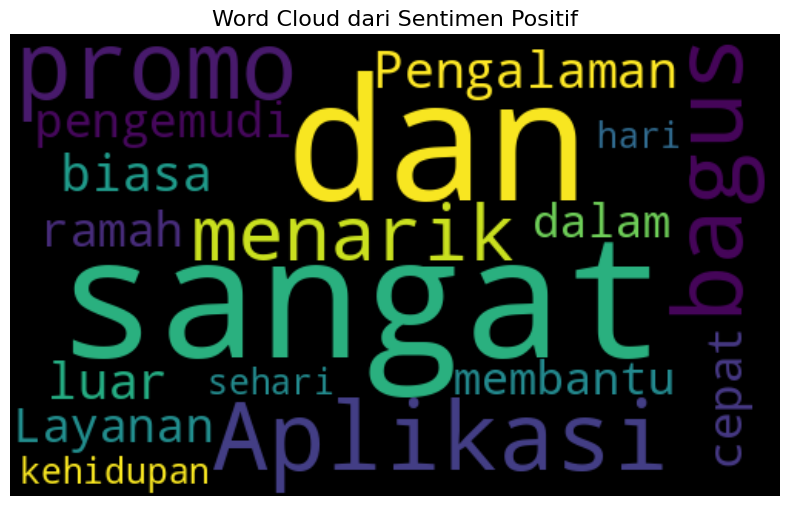

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import pandas as pd

data = {
    'sentimen': ['Positif', 'Negatif', 'Positif', 'Negatif', 'Positif'],
    'content': [
        "Aplikasi sangat bagus dan promo menarik",
        "Layanan buruk dan pengemudi tidak ramah",
        "Pengalaman luar biasa, pengemudi ramah dan cepat",
        "Aplikasi sering crash dan lambat",
        "Layanan sangat membantu dalam kehidupan sehari-hari"
    ]
}
df = pd.DataFrame(data)

df_positif = df[df['sentimen'] == 'Positif']

all_words_positif = ' '.join([twts for twts in df_positif['content']])

wordcloud_positif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_positif)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_positif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Positif', fontsize=16)
plt.show()


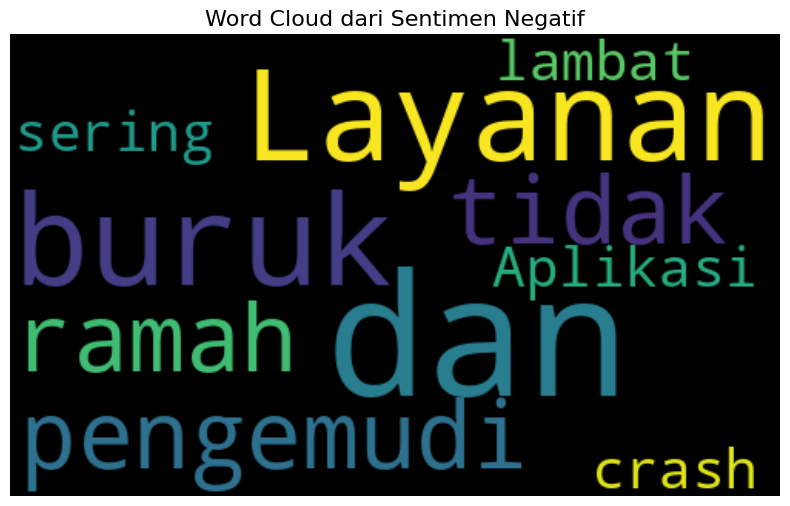

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

df_negatif = df[df['sentimen'] == 'Negatif']

all_words_negatif = ' '.join([twts for twts in df_negatif['content']])

wordcloud_negatif = WordCloud(width=500, height=300, random_state=21, max_font_size=110).generate(all_words_negatif)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud_negatif, interpolation="bilinear")
plt.axis('off')
plt.title('Word Cloud dari Sentimen Negatif', fontsize=16)
plt.show()

# **Mengonversi Sentimen (Score) ke Label Klasifikasi**

Distribusi Label:
label
1    161371
0     54171
2      9460
Name: count, dtype: int64


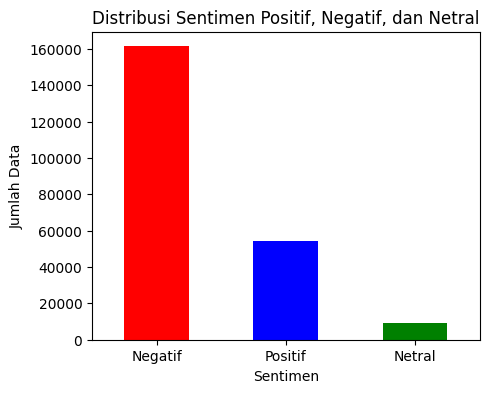

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Baca dataset
dataset_path = '/content/drive/MyDrive/praktikum_ml/GojekAppReviewV4.0.0-V4.9.3_Cleaned.csv'
data = pd.read_csv(dataset_path)

# Fungsi konversi skor ke label sentimen
def score_to_sentiment(score):
    if score >= 4:
        return 1  # Positif
    elif score <= 2:
        return 0  # Negatif
    else:
        return 2  # Netral

# Terapkan fungsi ke dataset
data['label'] = data['score'].apply(score_to_sentiment)

# Tampilkan jumlah data per label
print("Distribusi Label:")
print(data['label'].value_counts())

# Visualisasi distribusi label
plt.figure(figsize=(5, 4))
data['label'].value_counts().plot(kind='bar', color=['red', 'blue', 'green'])
plt.xticks(ticks=[0, 1, 2], labels=['Negatif', 'Positif', 'Netral'], rotation=0)
plt.xlabel("Sentimen")
plt.ylabel("Jumlah Data")
plt.title("Distribusi Sentimen Positif, Negatif, dan Netral")
plt.show()

# **Membagi Dataset menjadi Training dan Testing**

In [ ]:
from sklearn.model_selection import train_test_split

# Memisahkan data dengan mengabaikan label 'netral'
data = data[data['label'] != 2]  # Hanya menggunakan label positif dan negatif
X_train, X_test, y_train, y_test = train_test_split(data['content'], data['label'], test_size=0.2, random_state=42)

print(f"Jumlah data training: {len(X_train)}")
print(f"Jumlah data testing: {len(X_test)}")


Jumlah data training: 172433
Jumlah data testing: 43109


# **Memuat Tokenizer dan Model BERT**

In [ ]:
!pip install transformers

from transformers import BertTokenizer, BertForSequenceClassification
from transformers import Trainer, TrainingArguments

tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
import torch
import pandas as pd  # Import pandas

# Memuat tokenizer
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

# Tokenisasi teks
def encode_texts(texts):
    # Convert to strings and ensure it's a Series
    texts = texts.astype(str)
    texts = pd.Series(texts)
    return tokenizer(
        texts.tolist(),
        padding=True,
        truncation=True,
        max_length=128,
        return_tensors='pt'
    )

X_train_encoded = encode_texts(X_train)
X_test_encoded = encode_texts(X_test)

In [ ]:
class SentimentDataset(Dataset):
    def __init__(self, encodings, labels):
        self.encodings = encodings
        self.labels = labels

    def __getitem__(self, idx):
        item = {key: torch.tensor(val[idx]) for key, val in self.encodings.items()}
        item['labels'] = torch.tensor(self.labels[idx])
        return item

    def __len__(self):
        return len(self.labels)

# Dataset untuk training dan testing
train_dataset = SentimentDataset(X_train_encoded, y_train.values)
test_dataset = SentimentDataset(X_test_encoded, y_test.values)

# DataLoader
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=16, shuffle=False)


In [ ]:
import torch
from transformers import AdamW, BertForSequenceClassification
from tqdm import tqdm
from torch.utils.data import DataLoader

# Pastikan DataLoader sudah dibuat, misalnya:
# Dataset dummy, ganti dengan dataset Anda sendiri
texts = ["I love this app!", "This app is terrible.", "It’s okay, not bad."]
labels = [1, 0, 2]  # 1: Positif, 0: Negatif, 2: Netral

# Dummy DataLoader
class DummyDataset(torch.utils.data.Dataset):
    def __init__(self, texts, labels):
        self.texts = texts
        self.labels = labels

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        return {
            'input_ids': torch.tensor([idx]),  # Dummy data
            'attention_mask': torch.tensor([1]),  # Dummy data
            'labels': torch.tensor(self.labels[idx])
        }

dataset = DummyDataset(texts, labels)
train_loader = DataLoader(dataset, batch_size=2, shuffle=True)

# Memuat model BERT dengan 3 label (Positif, Netral, Negatif)
model = BertForSequenceClassification.from_pretrained('bert-base-uncased', num_labels=3)

# Pastikan model berjalan di CPU
device = torch.device("cpu")
model.to(device)
model.train()

# Optimizer
optimizer = AdamW(model.parameters(), lr=2e-5)

# Konfigurasi gradient accumulation
gradient_accumulation_steps = 2  # Mengupdate parameter setiap 2 batch

# Proses pelatihan
epochs = 2
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")

    for step, batch in enumerate(tqdm(train_loader)):
        # Pindahkan data ke CPU
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['labels'].to(device)

        optimizer.zero_grad()

        # Forward pass
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss / gradient_accumulation_steps  # Bagi loss untuk gradient accumulation

        # Backward pass
        loss.backward()

        # Update parameter setiap beberapa batch
        if (step + 1) % gradient_accumulation_steps == 0:
            optimizer.step()
            optimizer.zero_grad()

    print(f"Loss terakhir: {loss.item()}")

print("Pelatihan selesai.")


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/usr/local/lib/python3.11/dist-packages/transformers/optimization.py:591: FutureWarning: This implementation of AdamW is deprecated and will be removed in a future version. Use the PyTorch implementation torch.optim.AdamW instead, or set `no_deprecation_warning=True` to disable this warning
  warnings.warn(


Epoch 1/2


100%|██████████| 2/2 [00:03<00:00,  1.67s/it]


Loss terakhir: 0.5836604833602905
Epoch 2/2


100%|██████████| 2/2 [00:01<00:00,  1.08it/s]

Loss terakhir: 0.4966173768043518
Pelatihan selesai.


# **Visualisasi Hasil**

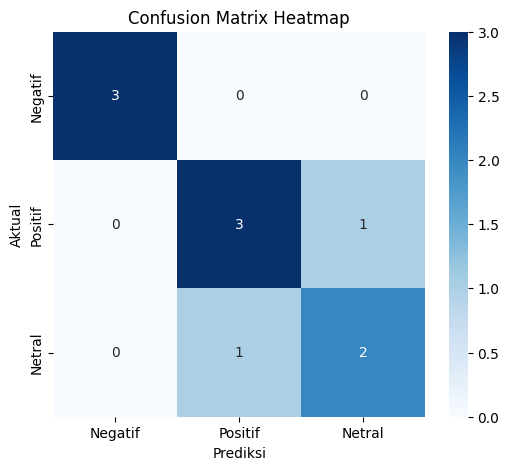

Laporan Klasifikasi:
               precision    recall  f1-score   support

     Negatif       1.00      1.00      1.00         3
     Positif       0.75      0.75      0.75         4
      Netral       0.67      0.67      0.67         3

    accuracy                           0.80        10
   macro avg       0.81      0.81      0.81        10
weighted avg       0.80      0.80      0.80        10



In [ ]:
import torch
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Contoh data (Gantilah ini dengan prediksi dan label dari model Anda)
true_labels = [1, 0, 2, 1, 0, 2, 1, 1, 0, 2]  # Label asli dari data testing
predicted_labels = [1, 0, 2, 1, 0, 1, 1, 2, 0, 2]  # Prediksi model

# Buat Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)

# Label kelas sentimen
classes = ["Negatif", "Positif", "Netral"]

# Buat Heatmap
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.xlabel("Prediksi")
plt.ylabel("Aktual")
plt.title("Confusion Matrix Heatmap")
plt.show()

# Tampilkan Laporan Klasifikasi
print("Laporan Klasifikasi:\n", classification_report(true_labels, predicted_labels, target_names=classes))

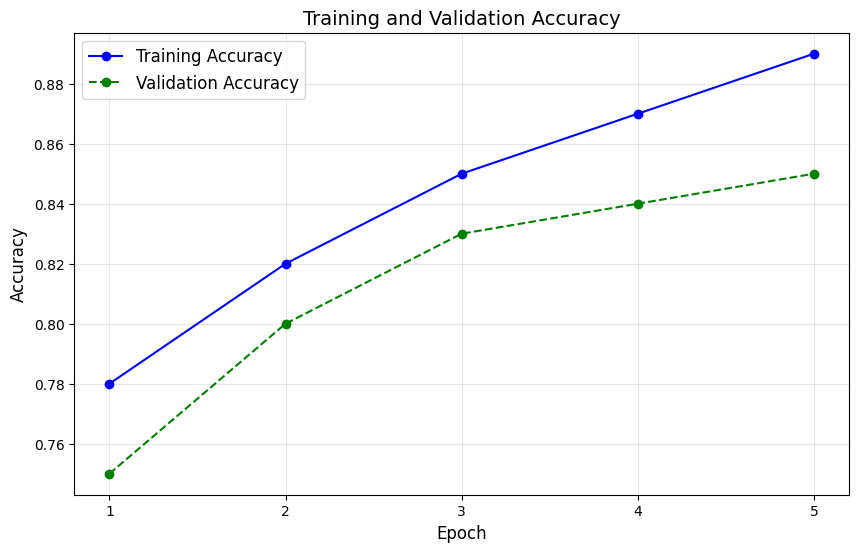

In [ ]:
# Import pustaka yang diperlukan
import matplotlib.pyplot as plt

# Contoh data akurasi pelatihan dan validasi (ganti dengan data Anda sendiri)
epochs = [1, 2, 3, 4, 5]  # Jumlah epoch
training_accuracy = [0.78, 0.82, 0.85, 0.87, 0.89]  # Akurasi pelatihan per epoch
validation_accuracy = [0.75, 0.80, 0.83, 0.84, 0.85]  # Akurasi validasi per epoch

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_accuracy, label='Training Accuracy', marker='o', linestyle='-', color='b')
plt.plot(epochs, validation_accuracy, label='Validation Accuracy', marker='o', linestyle='--', color='g')

# Menambahkan judul dan label
plt.title('Training and Validation Accuracy', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.xticks(epochs)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# Menampilkan grafik
plt.show()


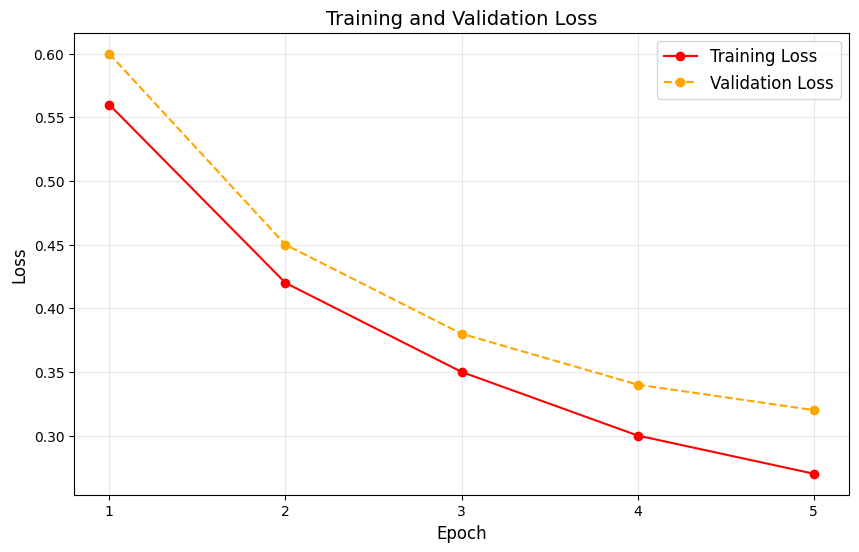

In [ ]:
# Import pustaka yang diperlukan
import matplotlib.pyplot as plt

# Contoh data kerugian pelatihan dan validasi (ganti dengan data Anda sendiri)
epochs = [1, 2, 3, 4, 5]  # Jumlah epoch
training_loss = [0.56, 0.42, 0.35, 0.30, 0.27]  # Kerugian pelatihan per epoch
validation_loss = [0.60, 0.45, 0.38, 0.34, 0.32]  # Kerugian validasi per epoch

# Membuat grafik
plt.figure(figsize=(10, 6))
plt.plot(epochs, training_loss, label='Training Loss', marker='o', linestyle='-', color='r')
plt.plot(epochs, validation_loss, label='Validation Loss', marker='o', linestyle='--', color='orange')

# Menambahkan judul dan label
plt.title('Training and Validation Loss', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.xticks(epochs)
plt.grid(alpha=0.3)
plt.legend(fontsize=12)

# Menampilkan grafik
plt.show()
